In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
path = '/content/drive/My Drive/영상처리/'

In [10]:
import cv2
import os

if os.path.isfile(path + 'lena.jpg'): 
  lena = cv2.imread(path + 'lena.jpg')
else:
  print('no file')

lena_rgb = lena[:,:,::-1]


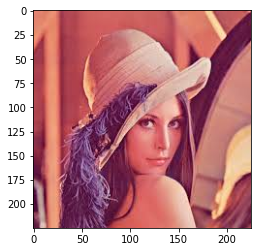

In [11]:
import matplotlib.pyplot as plt
plt.imshow(lena_rgb)
plt.show()

## Color Histogram Equalization
가장 단순한 HE 방식은 각 채널별로 HE을 한 뒤에 한 이미지로 만드는 것이다.


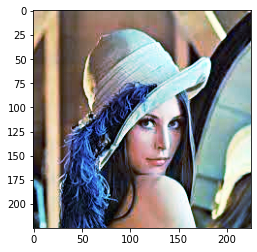

In [12]:
r,g,b = cv2.split(lena_rgb)
r_he = cv2.equalizeHist(r)
g_he = cv2.equalizeHist(g)
b_he = cv2.equalizeHist(b)

channel_he = cv2.merge([r_he,g_he,b_he])

plt.imshow(channel_he)

그러나 각 채널별로 히스토그램 평준화를 하게 되면 색상의 변화가 생기게 된다.

이러한 이유는 히스토그램 평준화 과정은 히스토그램의 값을 일정하게 분배하는 방식이기 때문이다.
컬러 영상은 3개의 채널을 가지고 있으며 각 채널이 하나로 합쳐지면서 색의 조합을 이루게 된다.

그러나 각 채널을 각각 평준화하게 되면, 이러한 조합이 파괴되어 새로운 색을 가지는 영상이 나타나게 된다.

이를 해결하기 위해서는 영상의 색상을 평준화하는 것이 아니라 영상의 밝기 정보만을 이용하여 평준화하는 것이다.

**이를 위해 영상의 RGB 공간을 밝기 채널을 포함하는 색공간으로 변환하여 평준화해야 한다.**
* HSV 방식의 색공간으로 바꾼 뒤에 V 채널을 평준화하여 병합한다.
* YCrCb 방식의 색공간으로 바꾼 뒤에 밝기 영역인 Y 채널을 평준화하여 Cr, Cb 채널과 병합한다.


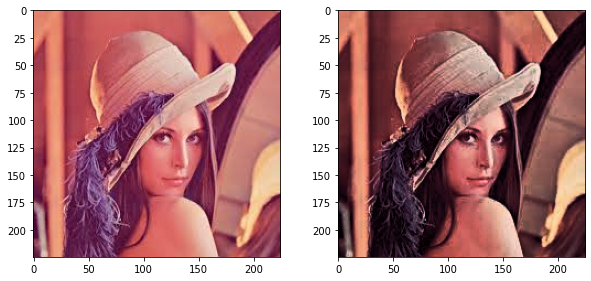

In [13]:
# HSV 색공간 이용
lena_HSV = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)

H, S, V = cv2.split(lena_HSV)
V_he = cv2.equalizeHist(V)

HSV_he = cv2.merge([H, S, V_he])
HSV_he_rgb = cv2.cvtColor(HSV_he, cv2.COLOR_HSV2BGR)
HSV_he_rgb = HSV_he_rgb[:,:,::-1]

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(lena_rgb)
plt.subplot(2,2,2),plt.imshow(HSV_he_rgb)
plt.show()

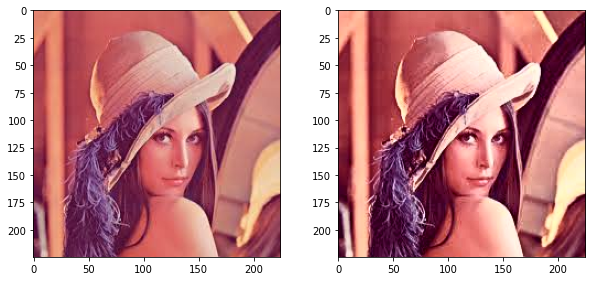

In [14]:
# YCrCb 색공간 이용 
lena_YCrCb = cv2.cvtColor(lena, cv2.COLOR_BGR2YCrCb)

Y, Cr, Cb = cv2.split(lena_YCrCb)
Y_he = cv2.equalizeHist(Y)

YCrCb_he = cv2.merge([Y_he,Cr,Cb])
yCrCb_he_rgb = cv2.cvtColor(YCrCb_he, cv2.COLOR_YCrCb2BGR)
yCrCb_he_rgb = yCrCb_he_rgb[:,:,::-1]

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(lena_rgb)
plt.subplot(2,2,2),plt.imshow(yCrCb_he_rgb)
plt.show()